In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
cols = ["V1","V2","V3","V4", "V5", "Target"]
assignment = pd.read_csv("Assignment.csv", encoding='utf-8', header=None, names=cols)

In [3]:
assignment = assignment.iloc[1:,:-1] # to skip the header and label

In [4]:
assignment.describe() # why is this not showing all details?

,V1,V2,V3,V4,V5
count,748,748,748,748,748
unique,32,33,33,78,1
top,2.0,1.0,250.0,4.0,NEGATIVE
freq,171,158,158,57,748


In [5]:
#how many features have unknowns; and what's the total number of unknowns
print((assignment['V1'] == "?").sum())
print((assignment['V2'] == "?").sum())
print((assignment['V3'] == "?").sum())
print((assignment['V4'] == "?").sum())
print((assignment['V5'] == "?").sum())

5
5
0
0
0


In [6]:
assignment.replace("?", 0, inplace=True) # replace all ? by np.nan
assignment.replace('NEGATIVE', 1, inplace=True)

In [7]:
V1 = assignment['V1'].astype(float)
V2 = assignment['V2'].astype(float)
V3 = assignment['V3'].astype(float)
V4 = assignment['V4'].astype(float)
V5 = assignment['V5'].astype(float)

In [8]:
print(np.var(V1), np.var(V2), np.var(V3), np.var(V4), np.var(V5))

65.5868966084245 33.565643855986664 2128245.173403577 593.4297860247633 0.0


In [9]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='median')
si.fit_transform(assignment)[:,1].mean()

5.427807486631016

In [10]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=3)
knn.fit_transform(assignment)[:,0].mean()

9.498663101604278

{'whiskers': [<matplotlib.lines.Line2D at 0x183fe90d6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x183fe90dd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x183fe90d250>],
 'medians': [<matplotlib.lines.Line2D at 0x183fe91b460>],
 'fliers': [<matplotlib.lines.Line2D at 0x183fe91b7f0>],
 'means': []}

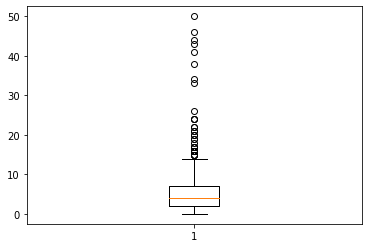

In [11]:
plt.boxplot(V2) #has the least number of outliers compared to V2 and V3

In [12]:
cols = ["V1","V2","V3","V4", "V5", "Target"]
assignment = pd.read_csv("Assignment.csv", encoding='utf-8', header=None, names=cols)

In [13]:
assignment = assignment.iloc[1:,:-1] # to skip the header and label

In [14]:
assignment.replace("?", 0, inplace=True) # replace all ? by np.nan
assignment.replace('NEGATIVE', 1, inplace=True)

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.feature_selection import VarianceThreshold

si = SimpleImputer(strategy='mean')
ss = StandardScaler()
oe = OrdinalEncoder()

SI = ('1', si, [0, 1])
SS = ('2', ss, [0, 1, 2, 3])
OE = ('3', oe, [4])

PIPE_1 = ('pipe_1', ColumnTransformer([SI, SS]))
PIPE_2 = ('pipe_2', ColumnTransformer([OE]))

pipe_1 = Pipeline([PIPE_1])
pipe_2 = Pipeline([PIPE_2])

fu = FeatureUnion(transformer_list=[('LHS', pipe_1), 
                                    ('RHS', pipe_2)])

vt = VarianceThreshold(threshold=0.1)

from sklearn import set_config
set_config(display='diagram')
Final = Pipeline([('fu', fu), ('vt', vt)])
Final

Pipeline(steps=[('fu',
                 FeatureUnion(transformer_list=[('LHS',
                                                 Pipeline(steps=[('pipe_1',
                                                                  ColumnTransformer(transformers=[('1',
                                                                                                   SimpleImputer(),
                                                                                                   [0,
                                                                                                    1]),
                                                                                                  ('2',
                                                                                                   StandardScaler(),
                                                                                                   [0,
                                                                                                    1,
                                                                                                    2,
                                                                                                    3])]))])),
                                                ('RHS',
                                                 Pipeline(steps=[('pipe_2',
                                                                  ColumnTransformer(transformers=[('3',
                                                                                                   OrdinalEncoder(),
                                                                                                   [4])]))]))])),
                ('vt', VarianceThreshold(threshold=0.1))])

In [16]:
Final.fit_transform(assignment)

array([[ 2.00000000e+00,  5.00000000e+01, -9.25923915e-01,
         7.69336800e+00,  7.62334626e+00,  2.61563344e+00],
       [ 0.00000000e+00,  1.30000000e+01, -1.17288098e+00,
         1.30699569e+00,  1.28273826e+00, -2.57880900e-01],
       [ 0.00000000e+00,  0.00000000e+00, -1.17288098e+00,
        -9.36864849e-01,  1.79684161e+00,  2.94705348e-02],
       ...,
       [ 2.30000000e+01,  3.00000000e+00,  1.66712527e+00,
        -4.19050878e-01, -4.30939574e-01,  1.13782607e+00],
       [ 3.90000000e+01,  1.00000000e+00,  3.64278178e+00,
        -7.64260192e-01, -7.73675141e-01,  1.93671355e-01],
       [ 7.20000000e+01,  1.00000000e+00,  7.71757335e+00,
        -7.64260192e-01, -7.73675141e-01,  1.54832812e+00]])